<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/Econometria_/blob/School/Trabajo%20casi%20listo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECONOMETRÍA
##Trabajo Final
* ### Cuenca Fitz Alexis Manuel
* ### Gomez Rodríguez Lizzeth
* ### Pineda Sandoval Tania Jocelyn




La base de datos a utilizar es la **ESRU-EMOVI 2017** que es una Encuesta de Movilidad Social del Centro de Estudios Espinosa Yglesias (CEEY), que se puede encontrar en la siguiente liga kjunto con el cuestionario: https://ceey.org.mx/contenido/que-hacemos/emovi/

In [25]:
#Instalamos las paqueterías necesarias
!pip install pyreadstat
!pip install statsmodels
!pip install pandas plotnine

In [0]:
#Importamos las librerías a utilizar
import pyreadstat #librería para leer  formato.dta
import pandas as pd #librería para manipulación de datos
import matplotlib #librería para graficar
from matplotlib import pyplot as plt #librería para graficar


import statsmodels.api as sm #librería para análisis estadístico
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
from statsmodels.iolib.summary2 import summary_col


In [0]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

In [0]:
%matplotlib inline

In [0]:
import pylab as pl

In [0]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

In [0]:
#Leemos la base de datos
emovi = pd.read_csv('Emovi3.csv')

In [8]:
emovi.head()

,edad,sexo,escolaridad,empleo,ingreso,discriminacion,dis_trabajo,dis_escuela,dis_oficina,dis_hogar,dis_barrio,dis_otro,color,region,rururb
0,64,2,9.0,1.0,4.0,0,0,0,0,0,0,0,8,3,0
1,60,1,3.0,5.0,4.0,0,0,0,0,0,0,0,8,3,0
2,64,1,7.0,1.0,4.0,0,0,0,0,0,0,0,8,3,0
3,63,2,2.0,NaN,2.0,0,0,0,0,0,0,0,9,3,0
4,64,2,2.0,NaN,3.0,0,0,0,0,0,0,0,8,3,0


In [0]:
emovi.describe()

,edad,sexo,escolaridad,empleo,ingreso,discriminacion,dis_trabajo,dis_escuela,dis_oficina,dis_hogar,dis_barrio,dis_otro,color,region,rururb
count,17665.000000,17665.000000,17664.000000,14110.000000,15229.000000,17665.000000,17665.000000,17665.000000,17665.00000,17665.000000,17665.000000,17665.000000,17665.000000,17665.000000,17665.000000
mean,43.636569,1.608322,4.899457,2.345571,3.179066,0.019757,0.006453,0.004982,0.00368,0.002887,0.007246,0.002095,7.262100,3.233569,0.115369
std,12.000790,0.488139,3.116575,1.816030,1.470904,0.139167,0.080076,0.070406,0.06055,0.053655,0.084817,0.045719,1.317783,1.404015,0.319476
min,25.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,34.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000
50%,43.000000,2.000000,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,4.000000,0.000000
75%,54.000000,2.000000,6.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000,4.000000,0.000000
max,64.000000,2.000000,12.000000,6.000000,7.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,11.000000,5.000000,1.000000


In [0]:
#emovi.rename(columns={'p05':'edad','p06':'sexo','p13':'escolaridad','p102':'empleo','p133':'ingreso','p1505':'discriminacion','p1505_1':'dis_trabajo','p1505_2':'dis_escuela','p1505_3':'dis_oficina','p1505_4':'dis_hogar','p1505_5':'dis_barrio','p1505_6':'dis_otro','p151':'color','r579on':'region','rurur2':'rurur'})

In [0]:
print(emovi.ingreso)

0        4.0
1        4.0
2        4.0
3        2.0
4        3.0
        ... 
17660    3.0
17661    1.0
17662    2.0
17663    1.0
17664    3.0
Name: ingreso, Length: 17665, dtype: float64


#Estadpistica Descriptiva

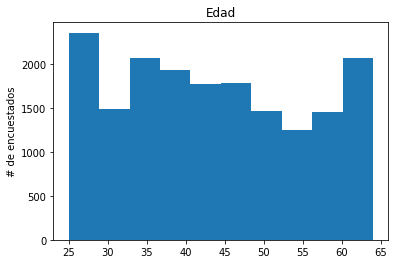

In [0]:
# plotting histogram in order to see
plt.hist(emovi.edad, histtype='bar')

#plt.legend()
plt.ylabel('# de encuestados')
plt.title('Edad')

plt.show()

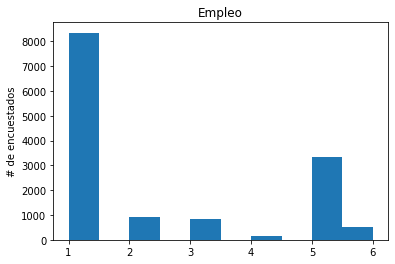

In [0]:
# plotting histogram in order to see
plt.hist(emovi.empleo, histtype='bar')

#plt.legend()
plt.ylabel('# de encuestados')
plt.title('Empleo')

plt.show()

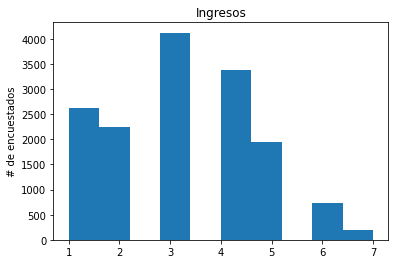

In [0]:
# plotting histogram in order to see
plt.hist(emovi.ingreso, histtype='bar')

#plt.legend()
plt.ylabel("# de encuestados")
plt.title("Ingresos")

plt.show()

In [0]:
# Borrado de NA's 
#emovi.dropna(subset=['discriminacion', 'color', 'rururb', 'region','ingreso', 'empleo'])

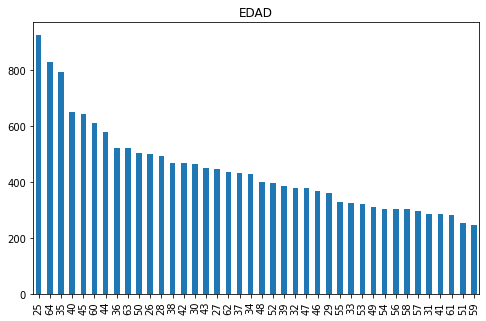

In [0]:
plot = emovi['edad'].value_counts().plot(kind='bar', 
                                          figsize=(8,5),
                                          title='EDAD')

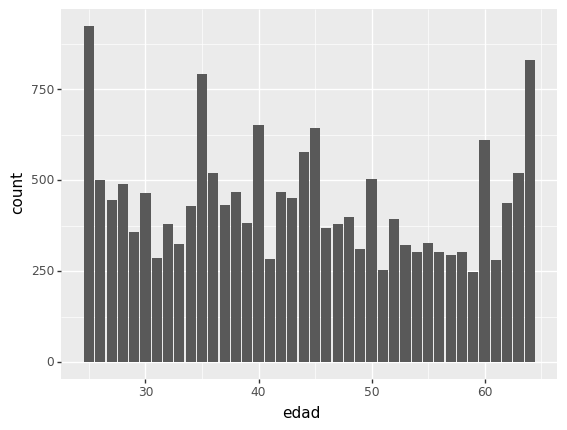

<ggplot: (-9223363305033368786)>

In [0]:
(ggplot(emovi)         # defining what data to use
 + aes(x='edad')    # defining what variable to use
 + geom_bar(size=15) # defining the type of plot to use
)

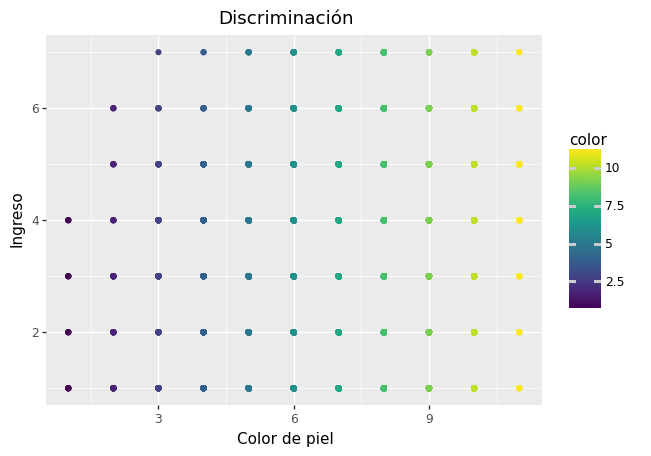

<ggplot: (-9223363305031742001)>

In [0]:
(ggplot(emovi)
 + aes(x='color', y='ingreso', color='color')
 + geom_point()
 + labs(title='Discriminación', x='Color de piel', y='Ingreso')
)

In [0]:
#Caracteristicas necesarias para el gráfico de pastel:
etiquetas = 'Mujer', 'Hombre'
sexos = emovi['sexo'].value_counts() #Saca la frecuencia con la que se repiten en el data_frame los valores únicos por campo
tamaños = sexos.values #Obtiene el array de los valores
colores = ['orange', 'purple'] #Colores para el piechart(gáfico de pastel)
resaltar = (0.1, 0) #Separación para resaltar
sexos


2    10746
1     6919
Name: sexo, dtype: int64

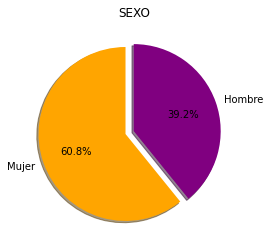

In [0]:
# Plot
plt.pie(tamaños, explode=resaltar, labels=etiquetas, colors=colores,
autopct='%1.1f%%', shadow=True, startangle=90,) #Inicialización del objeto pie
plt.title("SEXO")
plt.show() #Mostrar gráfica

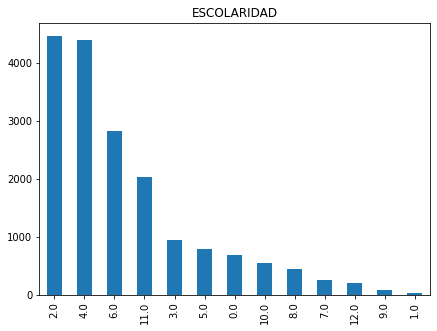

In [0]:
plot = logit(i'escolaridad'].value_counts().plot(kind='bar', 
                                          figsize=(7,5),
                                          title='ESCOLARIDAD')

#ANÁLISIS LOGÍSTICO

In [0]:
# Borrado de NA's 
emovi_1 = emovi.dropna(subset=['discriminacion', 'color', 'rururb', 'region', 'empleo', 'escolaridad', 'ingreso'])

In [33]:
X = emovi_1[['color', 'escolaridad', 'empleo']]
X = sm.add_constant(X)
Y = emovi_1['ingreso']
mdl = sm.MNLogit(Y, X)
mdl_fit = mdl.fit()

Optimization terminated successfully.
         Current function value: 1.644304
         Iterations 9


In [34]:
# Imprimiendo Resultados:
print(mdl_fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:                ingreso   No. Observations:                12370
Model:                        MNLogit   Df Residuals:                    12346
Method:                           MLE   Df Model:                           18
Date:                Fri, 12 Jun 2020   Pseudo R-squ.:                 0.05772
Time:                        01:07:16   Log-Likelihood:                -20340.
converged:                       True   LL-Null:                       -21586.
Covariance Type:            nonrobust   LLR p-value:                     0.000
  ingreso=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8745      0.192     -4.563      0.000      -1.250      -0.499
color           0.0828      0.025      3.371      0.001       0.035       0.131
escolaridad     0.0782      0.015      5.157    

In [19]:
# Efectos Marginnales:
mdl_margeff = mdl_fit.get_margeff()
print(mdl_margeff.summary())

       MNLogit Marginal Effects      
Dep. Variable:                ingreso
Method:                          dydx
At:                           overall
  ingreso=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
color          -0.0105      0.003     -3.795      0.000      -0.016      -0.005
escolaridad    -0.0032      0.001     -2.708      0.007      -0.006      -0.001
empleo          0.0163      0.002      8.184      0.000       0.012       0.020
-------------------------------------------------------------------------------
  ingreso=2      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
color          -0.0032      0.002     -1.529      0.126      -0.007       0.001
escolaridad    -0.0155      0.001    -14.254      0.000      -0.018      -0.013
empleo          0.0071      0.001      4.843    

EMPLEO

In [40]:
X = emovi_1[['color', 'rururb', 'sexo','escolaridad']]
X = sm.add_constant(X)
Y = emovi_1['empleo']
mdl = sm.MNLogit(Y, X)
mdl_fit = mdl.fit()

Optimization terminated successfully.
         Current function value: 1.067294
         Iterations 8


In [41]:
# Imprimiendo Resultados:
print(mdl_fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:                 empleo   No. Observations:                12370
Model:                        MNLogit   Df Residuals:                    12345
Method:                           MLE   Df Model:                           20
Date:                Fri, 12 Jun 2020   Pseudo R-squ.:                 0.08655
Time:                        01:11:04   Log-Likelihood:                -13202.
converged:                       True   LL-Null:                       -14453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
   empleo=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.8228      0.270    -17.888      0.000      -5.351      -4.294
color           0.0229      0.031      0.733      0.464      -0.038       0.084
rururb          0.2658      0.174      1.524    

In [42]:
# Efectos Marginnales:
mdl_margeff = mdl_fit.get_margeff()
print(mdl_margeff.summary())

       MNLogit Marginal Effects      
Dep. Variable:                 empleo
Method:                          dydx
At:                           overall
   empleo=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
color           0.0093      0.003      2.809      0.005       0.003       0.016
rururb         -0.1511      0.015    -10.299      0.000      -0.180      -0.122
sexo            0.0565      0.009      6.473      0.000       0.039       0.074
escolaridad     0.0287      0.002     18.229      0.000       0.026       0.032
-------------------------------------------------------------------------------
   empleo=2      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
color           0.0018      0.002      1.120      0.263      -0.001       0.005
rururb          0.0052      0.009      0.574    

ESCOLARIDAD

In [51]:
X = emovi_1[['color','sexo','ingreso','region']]
X = sm.add_constant(X)
Y = emovi_1['escolaridad']
mdl = sm.MNLogit(Y, X)
mdl_fit = mdl.fit()

Optimization terminated successfully.
         Current function value: 1.899621
         Iterations 10


In [52]:
# Imprimiendo Resultados:
print(mdl_fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:            escolaridad   No. Observations:                12370
Model:                        MNLogit   Df Residuals:                    12310
Method:                           MLE   Df Model:                           48
Date:                Fri, 12 Jun 2020   Pseudo R-squ.:                 0.05448
Time:                        01:20:55   Log-Likelihood:                -23498.
converged:                       True   LL-Null:                       -24852.
Covariance Type:            nonrobust   LLR p-value:                     0.000
 escolaridad=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3382      1.720     -0.778      0.437      -4.710       2.033
color             -0.0257      0.192     -0.134      0.894      -0.402       0.351
sexo               0.0615      0.543

In [53]:
# Efectos Marginnales:
mdl_margeff = mdl_fit.get_margeff()
print(mdl_margeff.summary())

       MNLogit Marginal Effects      
Dep. Variable:            escolaridad
Method:                          dydx
At:                           overall
 escolaridad=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
color             -0.0028      0.001     -2.535      0.011      -0.005      -0.001
sexo               0.0017      0.003      0.558      0.577      -0.004       0.008
ingreso           -0.0141      0.001    -10.656      0.000      -0.017      -0.012
region             0.0061      0.001      5.118      0.000       0.004       0.008
----------------------------------------------------------------------------------
escolaridad=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
color            -0.0001      0.000     -0.597      0.550      -0.001       0.000
sexo              0.0